In [1]:
from KRZmetric import *
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK45\\RK45\\trace_M187392_spin0.552770_E0.949676_Lz2.352592_Q5.426002_d10.000000_d20.000000_d30.000000.dat'

In [4]:
print(time.asctime(time.localtime(time.time())))
getwave(filename)
print(time.asctime(time.localtime(time.time())))#用append是用了8分15秒，约500M的数据
#用numpy只要两分钟！！

Thu Nov  8 14:29:13 2018
Thu Nov  8 14:31:09 2018


In [2]:
filename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M200000_spin0.500000_E0.946988_Lz2.293484_Q5.155543_d10.200000_d20.000000_d30.000000.dat'

In [3]:
filename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M187418_spin0.552982_E0.949671_Lz2.352460_Q5.425408_d10.000000_d20.000000_d30.000000.dat'

In [4]:
wave1=getwave(filename1,M=200000)
wave2=getwave(filename2,M=187418)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(190000, 195000)

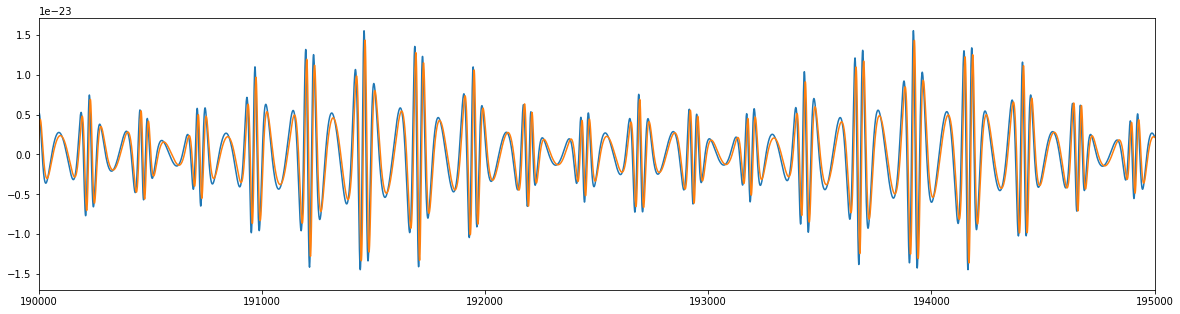

In [5]:
plt.figure(figsize=[20,5])
plt.plot(wave1[0],wave1[1])
plt.plot(wave2[0],wave2[1])
plt.xlim(190000,195000)

In [58]:
intp1=interp1d(wave1[0],wave1[1],kind='cubic')

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(90000, 91460)

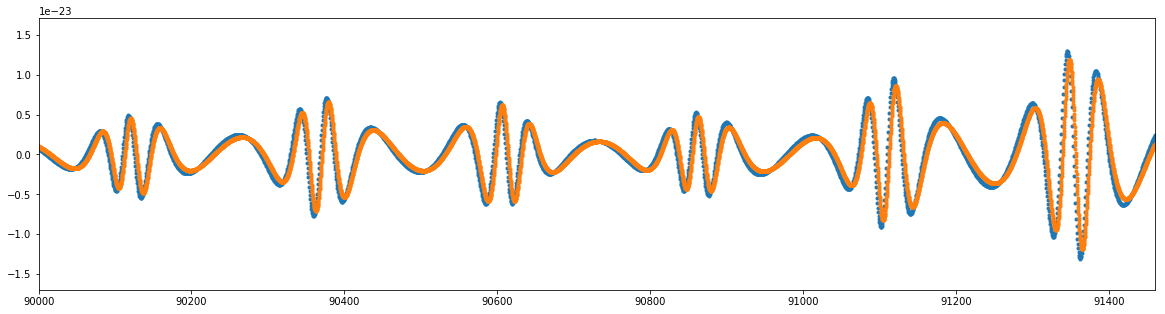

In [73]:
plt.figure(figsize=[20,5])
plt.plot(wave1[0],wave1[1],'.')
plt.plot(wave2[0],wave2[1],'.')
plt.xlim(90000,91460)

In [60]:
intp2=interp1d(wave2[0],wave2[1],kind='cubic')

In [96]:
tottime=min(wave2[0][-1],wave1[0][-1])

In [98]:
dt=5.
timeseries=np.arange(0,tottime,dt)
timeseries

array([  0.00000000e+00,   5.00000000e+00,   1.00000000e+01, ...,
         1.99985000e+05,   1.99990000e+05,   1.99995000e+05])

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(90000, 91460)

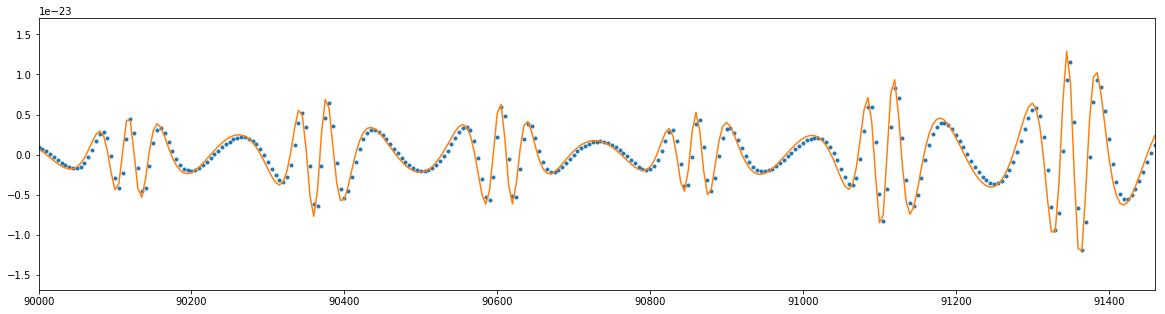

In [99]:
plt.figure(figsize=[20,5])
plt.plot(timeseries,intp2(timeseries),'.')
plt.plot(timeseries,intp1(timeseries))
plt.xlim(90000,91460)

In [100]:
bracket(intp2(timeseries),intp1(timeseries),dt)/np.sqrt(bracket(intp2(timeseries),intp2(timeseries),dt)*bracket(intp1(timeseries),intp1(timeseries),dt))

0.94437594976935912

In [70]:
bracket(wave1[1],wave2[1],0.5)/np.sqrt(bracket(wave1[1],wave1[1],0.5)*bracket(wave2[1],wave2[1],0.5))

0.0020185860573496799

In [102]:
for dt in np.arange(0.5,10,0.5):
    timeseries=np.arange(0,tottime,dt)
    print(bracket(intp2(timeseries),intp1(timeseries),dt)/np.sqrt(bracket(intp2(timeseries),intp2(timeseries),dt)*bracket(intp1(timeseries),intp1(timeseries),dt)))

0.944375252277
0.94437532697
0.944375213742
0.944375477633
0.944375553265
0.944375439022
0.94437561017
0.944375784116
0.944375393629
0.944375949769
0.94437565997
0.944375395217
0.94437536046
0.944375602057
0.944376087937
0.944376539823
0.944375872127
0.944375604584
0.944378295418


In [7]:
for dt in np.arange(0.5,10,0.5):
    print(overlap(wave1,wave2,dt=dt))

0.944375252277
0.94437532697
0.944375213742
0.944375477633
0.944375553265
0.944375439022
0.94437561017
0.944375784116
0.944375393629
0.944375949769
0.94437565997
0.944375395217
0.94437536046
0.944375602057
0.944376087937
0.944376539823
0.944375872127
0.944375604584
0.944378295418


In [ ]:
#OK没问题